In [15]:
# MLPでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets

# fetch_olivetti_facesデータセットを読み込む
faces = datasets.fetch_olivetti_faces()

# データの形状を確認（400人の顔データ／64*64=4096ピクセルデータという意味）
faces.data.shape

(400, 4096)

In [16]:
#説明変数と目的変数に分離する
# 説明変数 = x
x = faces.data
# 目的変数 = y
y = faces.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [17]:
# データを64*64=4096 の一次元配列に変換し正規化（255で割る）
# x_train = x_train.reshape(-1, 4096).astype('float32') / 255
# x_test = x_test.reshape(-1, 4096).astype('float32') / 255

In [18]:
# データのOneHotエンコーディング（P277のソースコードは使えません）
from tensorflow.keras import utils as np_utils

y_train = np_utils.to_categorical(y_train.astype('int32'),40)
y_test = np_utils.to_categorical(y_test.astype('int32'),40)

Epoch 1/200
18/18 [==============================] - 2s 36ms/step - loss: 7.5076 - accuracy: 0.0194 - val_loss: 4.1736 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 0s 26ms/step - loss: 3.8780 - accuracy: 0.0139 - val_loss: 3.8789 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 0s 25ms/step - loss: 3.7367 - accuracy: 0.0306 - val_loss: 3.7449 - val_accuracy: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 0s 26ms/step - loss: 3.6877 - accuracy: 0.0306 - val_loss: 3.6901 - val_accuracy: 0.0500
Epoch 5/200
18/18 [==============================] - 0s 27ms/step - loss: 3.6369 - accuracy: 0.0472 - val_loss: 3.6566 - val_accuracy: 0.0250
Epoch 6/200
18/18 [==============================] - 0s 27ms/step - loss: 3.5917 - accuracy: 0.0333 - val_loss: 3.7268 - val_accuracy: 0.0250
Epoch 7/200
18/18 [==============================] - 0s 25ms/step - loss: 3.4587 - accuracy: 0.0833 - val_loss: 3.5240 - val_accuracy: 0

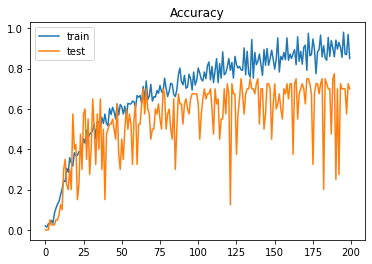

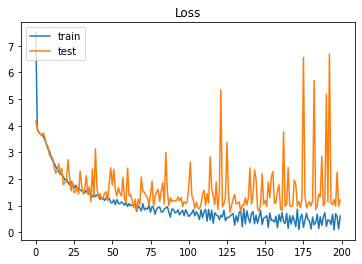

In [19]:
in_size = 64 * 64
out_size = 40
unit_cnt = 512
layer_cnt = 1

# MLPモデル構造を定義
model = Sequential()
model.add(Dense(unit_cnt, activation='relu', input_shape=(in_size,)))

for i in range(layer_cnt):
    model.add(Dense(unit_cnt, activation='relu')) 
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(x_train, y_train,
          batch_size=20, 
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
